## Importando bibliotecas e dataset

In [2]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Treating dataset and seeing informatio

In [19]:
#wine dataset
#names = creating a header to wine dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", usecols=[1, 2], 
                 names=['Alcohol', 'Malic acid'])

#considering only the alcohol and malic acid from the wine dataset
df.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [20]:
df.describe(include = "all")

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


## Plotting data

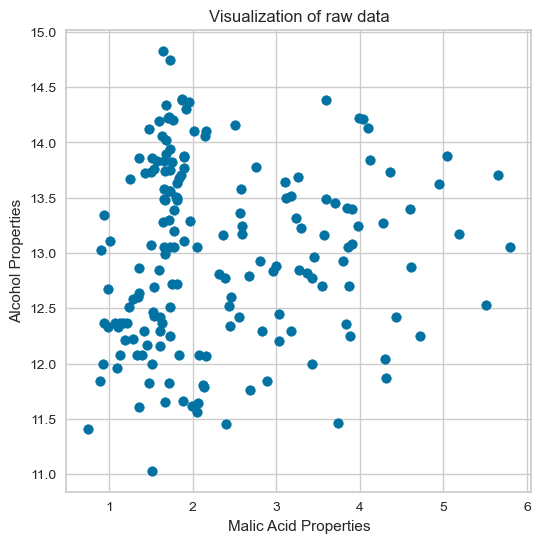

In [29]:

malic = df.iloc[:, 1]
alcohol = df.iloc[:, 0]

#plotting 
plt.figure(figsize=(6,6))
plt.scatter(malic, alcohol)

plt.xlabel('Malic Acid Properties')
plt.ylabel('Alcohol Properties')
plt.title('Visualization of raw data');


## Elbow method

c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'SSE (Sum of squared distance)')

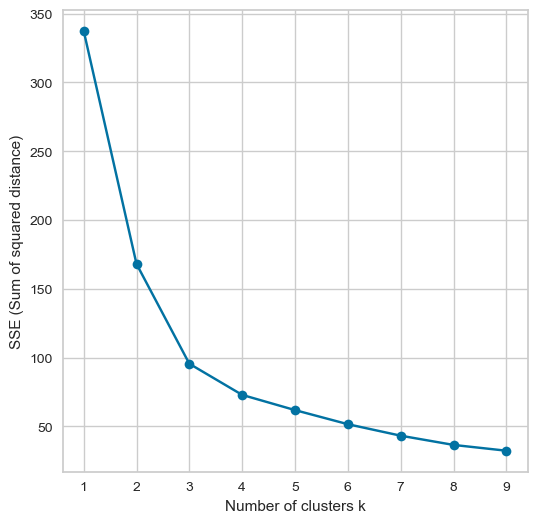

In [30]:
sse = [] #list of the sum of squared distance between the data points in each cluster
listk = list(range(1,10))

#interact with each k number possibility to find an elbow curve
for k in listk:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(listk, sse, '-o')
plt.xlabel(f'Number of clusters k')
plt.ylabel('SSE (Sum of squared distance)')

### Using KElbowVisualize from yellowbrick.cluster

c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

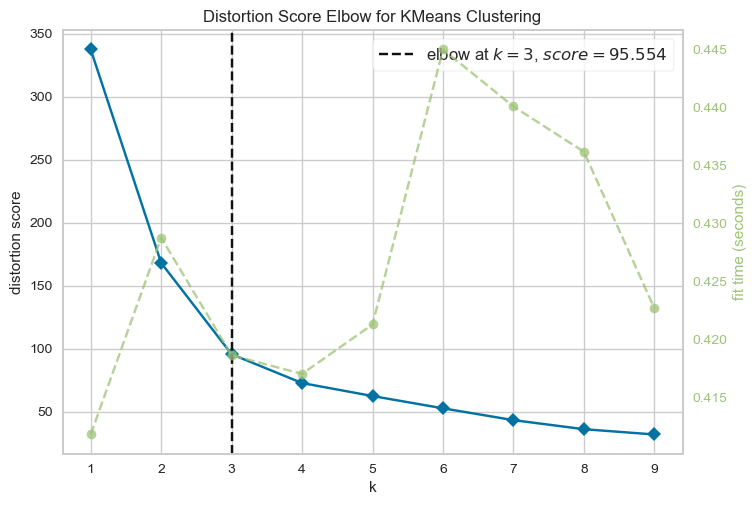

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)
visualizer.show()

### KMean method
Now we know that a good k number is equal to '3', let's apply this value to a k-mean clustering


In [37]:
kmeans = KMeans(n_clusters=3).fit(df)
cluster_labels = kmeans.fit_predict(df)

kmeans.cluster_centers_

c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

array([[12.21349206,  1.6531746 ],
       [13.0632    ,  3.8948    ],
       [13.71538462,  1.79969231]])

## KMedoids method

In [38]:
kmedoids = KMedoids(n_clusters=3, random_state=1).fit(df)
kmedoids.cluster_centers_



array([[13.16,  3.57],
       [12.29,  1.61],
       [13.75,  1.73]])